In [2]:
%%time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Wall time: 1min 8s


In [3]:
df = pd.read_csv('household_power_consumption.txt', sep = ';')

C:\Users\dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
a = np.array(df['Global_active_power'])
b = []

In [6]:
for i in a:
    if(not (type(i)==None or i=='?')):
        b.append(float(i))

Text(0, 0.5, 'Power in KW')

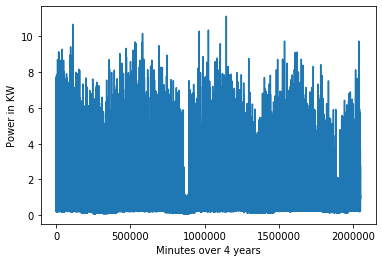

In [7]:
plt.plot(np.array(b))
plt.xlabel('Minutes over 4 years')
plt.ylabel('Power in KW')

In [8]:
x = np.array(list(np.arange(1440))*int(len(b)/1440))
b = b[:len(x)]

Text(0, 0.5, 'Power in KW')

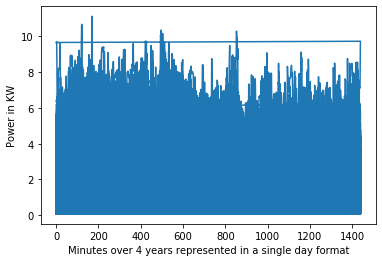

In [9]:
plt.plot(x,b)
plt.xlabel('Minutes over 4 years represented in a single day format')
plt.ylabel('Power in KW')

In [10]:
x  =x.reshape(-1,1)

In [11]:
b = np.array(b).reshape(-1,1)

In [12]:
minutes = x

In [13]:
power = b

In [14]:
mm = max(minutes)

In [15]:
mp = max(power)

In [16]:
mins = minutes/mm

In [17]:
pows = power/mp

In [18]:
b1 = np.array(b)

In [19]:
b2 = np.arange(len(b1))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(minutes,power,test_size=0.50, random_state=42) 

1.083022356933805


Text(0, 0.5, 'Power in KW')

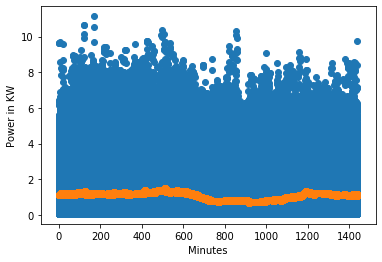

In [21]:
regr = DecisionTreeRegressor(max_depth=10)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
#Error_Percent['Information Entropy based ML algorithms'] = score(y_test,y_pred)
y_predf = regr.predict(minutes)
print(mean_squared_error(power,y_predf))
plt.scatter(minutes,power)
plt.scatter(minutes,y_predf)
plt.xlabel('Minutes')
plt.ylabel('Power in KW')

Degree of Polynomial:  8
MSE  1.08741728015609


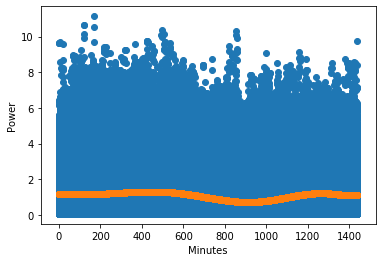

In [22]:
from sklearn.preprocessing import PolynomialFeatures

models = []
# Test upto 10 degree polynomial

for j in range(10):
    poly = PolynomialFeatures(degree=j)
    poly_x = poly.fit_transform(X_train)
    models.append(poly_x)

from sklearn.linear_model import LinearRegression

regressors = []
y_preds = []
mses = []

for model in models:
    regressor = LinearRegression()
    regressor.fit(model,y_train)
    regressors.append(regressor)

j=0
min_mse = -1
minj = -1

for regressor in regressors:
    poly = PolynomialFeatures(degree=j)
    poly_x = poly.fit_transform(X_test)    
    y_pred  = regressor.predict(poly_x)
    mse = mean_squared_error(y_pred,y_test)
    
    if(j==0):
        min_mse = mse
        minj = 0
    elif(min_mse>mse):
        min_mse = mse
        minj = j
    j+=1


print('Degree of Polynomial: ',minj)
#Error_Percent['Polynomial_Regression'] = min_mse
poly = PolynomialFeatures(degree=minj)

poly_x = poly.fit_transform(minutes)    
y_pred  = regressors[minj].predict(poly_x)
plt.scatter(minutes,power)
plt.scatter(minutes,y_pred)
plt.xlabel('Minutes')
plt.ylabel('Power')
#trained_models['Polynomial_Regression'] = regressors[minj]
#SaltoBloodGlc = regressors[minj]
print('MSE ', min_mse)